# Comparing Contact Frequencies: Bar Plots
In this notebook, we present a walk-through of the methods for comparing frequencies. In particular, we will use [mdciao.plots.compare_groups_of_contacts](https://proteinformatics.uni-leipzig.de/mdciao/api/generated/generated/mdciao.plots.compare_groups_of_contacts.htm). And we will try to refine, **step-by-step**, the same comparison plot, focusing on what the **individual parameters** can do to show or hide information.

<div class="alert alert-info">
    
<b>Note</b> 
    
In principle, ``mdciao`` tries to make sane decisions about hiding/showing information, but those do not cover all usecases and you're encouraged to learn how to customize the plots to your liking.
    
</div>


## The Data
We start off by loading [previously computed domain interfaces](https://proteinformatics.uni-leipzig.de/mdciao/Covid-19-Spike-Protein-Example.html) for publicly available MD data of the Covid-19 Spike Protein, curated in the impressive [**COVID-19 Molecular Structure and Therapeutics Hub**](https://covid.molssi.org) put together by the [Molecular Sciences Software Institute (molSSI)](https://covid.molssi.org/). 

In particular, we use the data generated in the [Chodera-Lab](https://www.choderalab.org/) by Ivy Zhang, consisting of
[Folding@home simulations of the SARS-CoV-2 spike RBD bound to human ACE2 (725.3 µs )](https://covid.molssi.org//simulations/#foldinghome-simulations-of-the-sars-cov-2-spike-rbd-bound-to-human-ace2). We quote:

> All-atom MD simulations of the SARS-CoV-2 spike protein receptor binding domain (RBD) bound to human angiotensin converting enzyme-related carboypeptidase (ACE2), simulated using Folding@Home. The “wild-type” RBD and three mutants (N439K, K417V, and the double mutant N439K/K417V) were simulated.  
...  
RUNs denote different RBD mutants: N439K (RUN0), K417V (RUN1), N439K/K417V (RUN2), and WT (RUN3). CLONEs denote different independent replica trajectories

We now load the data:

In [1]:
import mdciao, mdtraj as md, numpy as np
interfaces = np.load("interfaces.npy",allow_pickle=True)[()]
interfaces = {key:interfaces[key] for key in ['WT', 'K417V', 'N439K','N439K/K417V']}

## Step-by-Step Refining of the Comparison-Plot
We will be comparing contact frequencies by repeatedly calling [mdciao.plots.compare_groups_of_contacts](https://proteinformatics.uni-leipzig.de/mdciao/api/generated/generated/mdciao.plots.compare_groups_of_contacts.htm), with the same input data, only tweaking some of the parameters each time. This will generate **a lot** of plots, which we display here for learning purposes, but, **in principle**, you could be iterating over the same notebook cell until you like what you see.

<div class="alert alert-info">
    
<b>Note</b> 
    
Since the data is mutagenesis data, we need to pass along a ``mutations_dict`` so that ``mdciao`` knows that some residues are equivalent to each other even if they have different names:
    
```
mutations_dict={"V417": "K417",
                "K439": "N439"
               }
```
    
That, in itself, isn't a parameter for refining the plot, but rather to ensure that the comparison can take place.
</div>

These interactions are not shared:
0LB752-K417, 0LB752-R408, 0LB752-Y505, 0YB754-D427, 0YB754-K424, 0YB754-N460, 0YB754-R408, 0YB754-T415, 0fA755-K417, 4YB751-D405, 4YB751-E406, 4YB751-G416, 4YB751-K417, A2750-Q409, A2750-Q414, A2750-R408, A2750-T415, A2753-D420, A2753-G413, A2753-G416, A2753-K417, A2753-N460, A2753-Q409, A2753-Q414, A2753-R408, A2753-Y421, A386-Y505, ACE18-S477, D30-K417, E37-R403, F490-K31, H34-K417, K31-L492, L45-Q498, T415-VMB749, Y489-Y83
Their cumulative ctc freq is 22.73. 


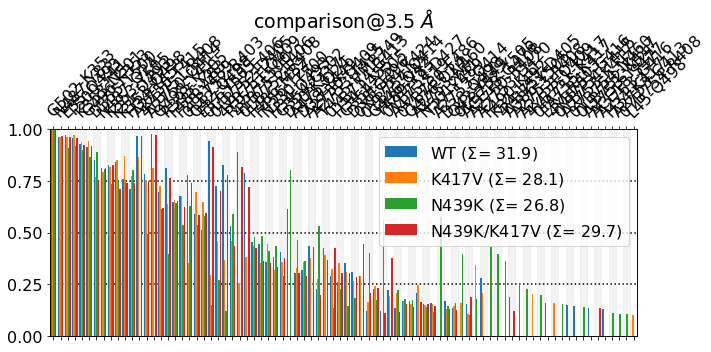

In [2]:
mdciao.plots.compare_groups_of_contacts(interfaces,
                                       ctc_cutoff_Ang=3.5,
                                       mutations_dict={"V417": "K417",
                                                       "K439": "N439"
                                                      });

Wow! We can't see anything. Let's start refining the plot.

### Figure Size
First, we simply make the figure a bit larger. There's two ways of doing this:

#### Using ``figsize``

These interactions are not shared:
0LB752-K417, 0LB752-R408, 0LB752-Y505, 0YB754-D427, 0YB754-K424, 0YB754-N460, 0YB754-R408, 0YB754-T415, 0fA755-K417, 4YB751-D405, 4YB751-E406, 4YB751-G416, 4YB751-K417, A2750-Q409, A2750-Q414, A2750-R408, A2750-T415, A2753-D420, A2753-G413, A2753-G416, A2753-K417, A2753-N460, A2753-Q409, A2753-Q414, A2753-R408, A2753-Y421, A386-Y505, ACE18-S477, D30-K417, E37-R403, F490-K31, H34-K417, K31-L492, L45-Q498, T415-VMB749, Y489-Y83
Their cumulative ctc freq is 22.73. 


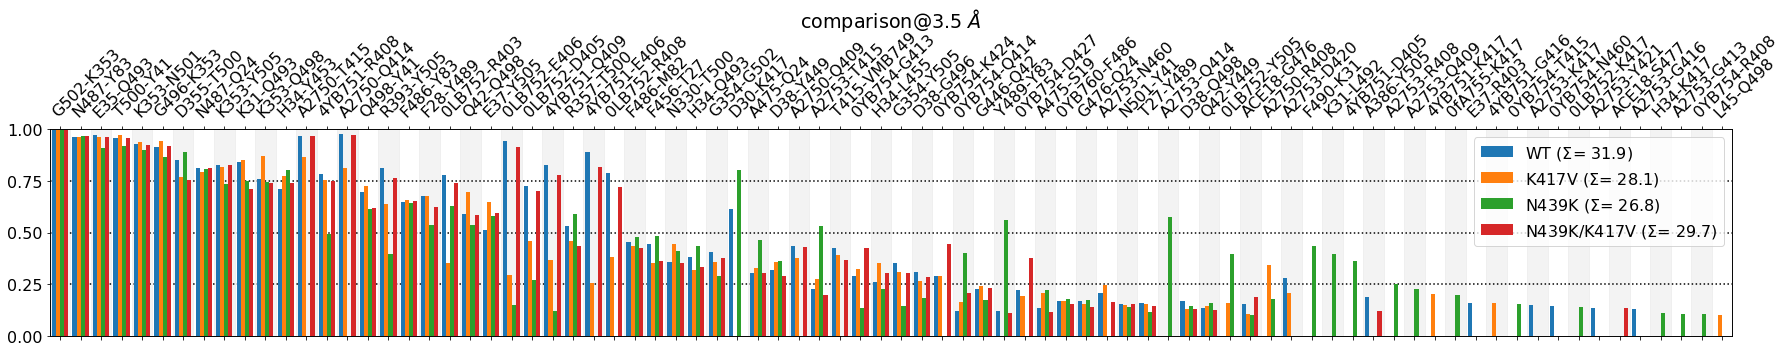

In [3]:
mdciao.plots.compare_groups_of_contacts(interfaces,
                                        ctc_cutoff_Ang=3.5,
                                        figsize=(25,5),
                                        mutations_dict={"V417": "K417",
                                                       "K439": "N439"
                                                       });

Much better already! 

Using ``figsize`` is a good option when having a specific figure (or ratio) is important. For instance, when stacking several figures on top of each other, or filling in a specific a spot on the paper/slide/poster. However, there's also the next option.

#### Using  ``inch_per_contacts=1`` (or some other numeric value) together with ``figsize=None``

This fixes the amount of axis space each contact gets. When stacking plots on top of each other, some plots will be shorter and some will be longer, but the **bars** in them will have the same width and occupy the same amount of axis space and look equally wide.

These interactions are not shared:
0LB752-K417, 0LB752-R408, 0LB752-Y505, 0YB754-D427, 0YB754-K424, 0YB754-N460, 0YB754-R408, 0YB754-T415, 0fA755-K417, 4YB751-D405, 4YB751-E406, 4YB751-G416, 4YB751-K417, A2750-Q409, A2750-Q414, A2750-R408, A2750-T415, A2753-D420, A2753-G413, A2753-G416, A2753-K417, A2753-N460, A2753-Q409, A2753-Q414, A2753-R408, A2753-Y421, A386-Y505, ACE18-S477, D30-K417, E37-R403, F490-K31, H34-K417, K31-L492, L45-Q498, T415-VMB749, Y489-Y83
Their cumulative ctc freq is 22.73. 


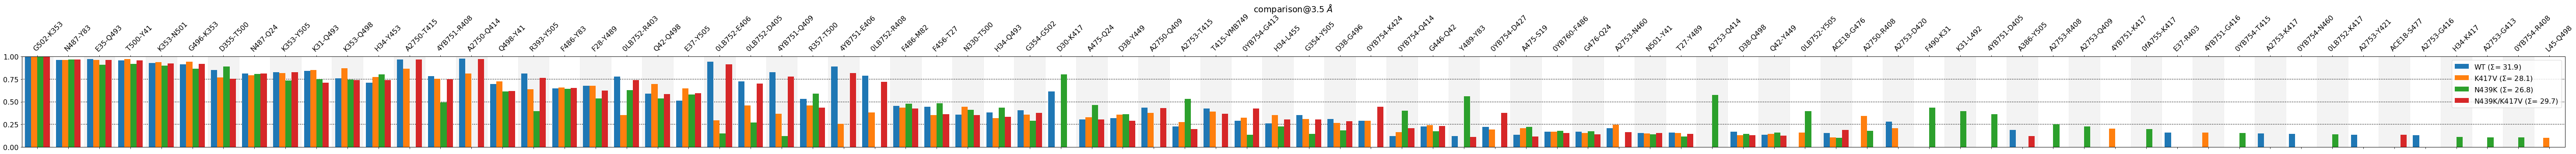

In [4]:
mdciao.plots.compare_groups_of_contacts(interfaces,
                                        ctc_cutoff_Ang=3.5,
                                        figsize=None,
                                        inch_per_contacts=1,
                                        mutations_dict={"V417": "K417",
                                                       "K439": "N439"
                                                       });

For now, we continue with with ``figsize`` and keep refining the plot.

These interactions are not shared:
0LB752-K417, 0LB752-R408, 0LB752-Y505, 0YB754-D427, 0YB754-K424, 0YB754-N460, 0YB754-R408, 0YB754-T415, 0fA755-K417, 4YB751-D405, 4YB751-E406, 4YB751-G416, 4YB751-K417, A2750-Q409, A2750-Q414, A2750-R408, A2750-T415, A2753-D420, A2753-G413, A2753-G416, A2753-K417, A2753-N460, A2753-Q409, A2753-Q414, A2753-R408, A2753-Y421, A386-Y505, ACE18-S477, D30-K417, E37-R403, F490-K31, H34-K417, K31-L492, L45-Q498, T415-VMB749, Y489-Y83
Their cumulative ctc freq is 22.73. 


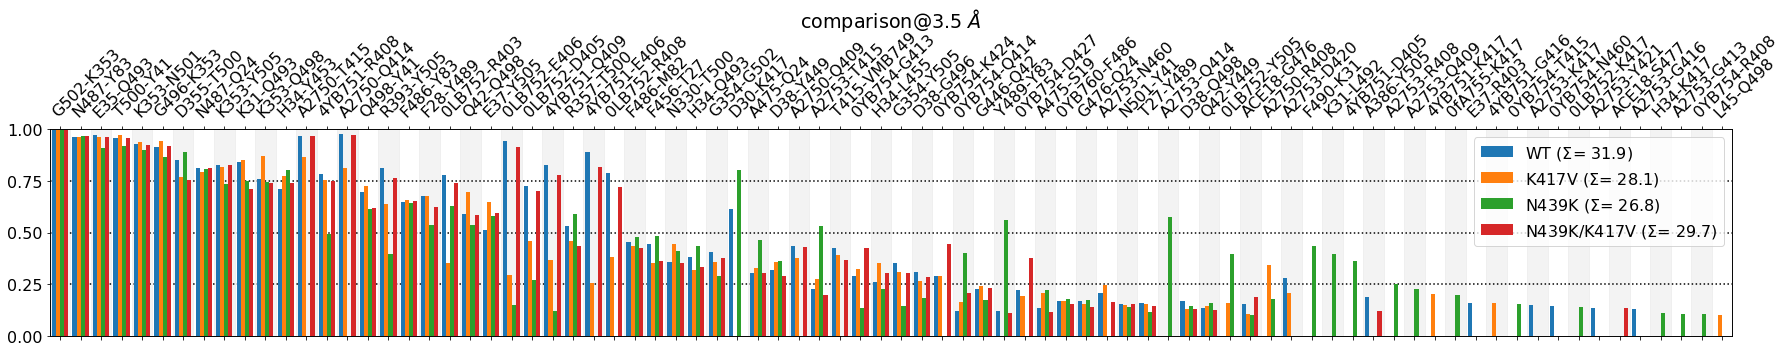

In [5]:
fig, freqs, plotted_freqs = mdciao.plots.compare_groups_of_contacts(interfaces,
                                                                    ctc_cutoff_Ang=3.5,
                                                                    figsize=(25,5) ,
                                                                    mutations_dict={"V417": "K417",
                                                                                    "K439": "N439"
                                                                                   });

Before continuing, some observations:

* The $\Sigma$ values in the legend  are simply the sum over all bar-heights for each system.  
  These four values provide a way to estimate the **average number of contacts** involved in the RBD-ACE interface in each system. Their absolute value shouldn't be taken too literally, since they're ``ctc_cutoff_Ang``-dependent, but **the differences among them** can be informative. In this case, they point towards the ``WT`` system having around **four more contacts on average** than .eg. the ``K417V`` system: $\Sigma$ 32 vs. 28, respectively.
  

* Apart from plotting the figure, [mdciao.plots.compare_groups_of_contacts](https://proteinformatics.uni-leipzig.de/mdciao/api/generated/generated/mdciao.plots.compare_groups_of_contacts.html) also returns a tuple of three Python objects: ``fig, freqs, plotted_freqs``. From the documentation:
  
  ```
  myfig : :obj:`~matplotlib.pyplot.Figure`
        Figure with the comparison plot
  freqs : dictionary
        Unified frequency dictionaries,
        including mutations and anchor
  plotted_freqs : dictionary
        Like :obj:`freqs` but sorted and purged
        according to the user-defined input options,
        s.t. it represents the plotted values
  ```
  
  This is very useful if we want to continue using the plotted values in the notebook, e.g. showing a formatted table using ``pandas`` [DataFrames](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html):

In [6]:
from pandas import DataFrame
DataFrame(plotted_freqs).round(3)

WT  K417V  N439K  N439K/K417V  mean
G502-K353    0.998  0.999  0.995        0.997  1.00
N487-Y83     0.963  0.965  0.966        0.970  0.97
E35-Q493     0.972  0.966  0.910        0.963  0.95
T500-Y41     0.956  0.971  0.921        0.961  0.95
K353-N501    0.930  0.937  0.899        0.923  0.92
...            ...    ...    ...          ...   ...
A2753-G416   0.132  0.000  0.000        0.000  0.03
H34-K417     0.000  0.000  0.110        0.000  0.03
A2753-G413   0.000  0.000  0.106        0.000  0.03
0YB754-R408  0.000  0.000  0.104        0.000  0.03
L45-Q498     0.000  0.101  0.000        0.000  0.03

[82 rows x 5 columns]

### Removing Identities
Next, we look at other ways of trimming the plot. We can, for instance, remove those contacts that are **always formed in all systems**. This effectively trims the plot **from the left**, hiding the contacts where where all four bars have heights larger or equal to a given value. This is loosely equivalent to a **baseline removal**. This is achieved with:
```
remove_identities=True,
identity_cutoff=1.
```
If we check the documentation:
```
remove_identities : bool, default is False
    If True, the contacts where
    freq[sys][ctc] >= :obj:`identity_cutoff`
    across all systems will not be plotted
    nor considered in the sum over contacts
identity_cutoff : float, default is 1
    If :obj:`remove_identities`, use this value to define what
    is considered an identity, s.t. contacts with values e.g. .95
    can also be removed
```

These interactions are not shared:
0LB752-K417, 0LB752-R408, 0LB752-Y505, 0YB754-D427, 0YB754-K424, 0YB754-N460, 0YB754-R408, 0YB754-T415, 0fA755-K417, 4YB751-D405, 4YB751-E406, 4YB751-G416, 4YB751-K417, A2750-Q409, A2750-Q414, A2750-R408, A2750-T415, A2753-D420, A2753-G413, A2753-G416, A2753-K417, A2753-N460, A2753-Q409, A2753-Q414, A2753-R408, A2753-Y421, A386-Y505, ACE18-S477, D30-K417, E37-R403, F490-K31, H34-K417, K31-L492, L45-Q498, T415-VMB749, Y489-Y83
Their cumulative ctc freq is 22.73. 


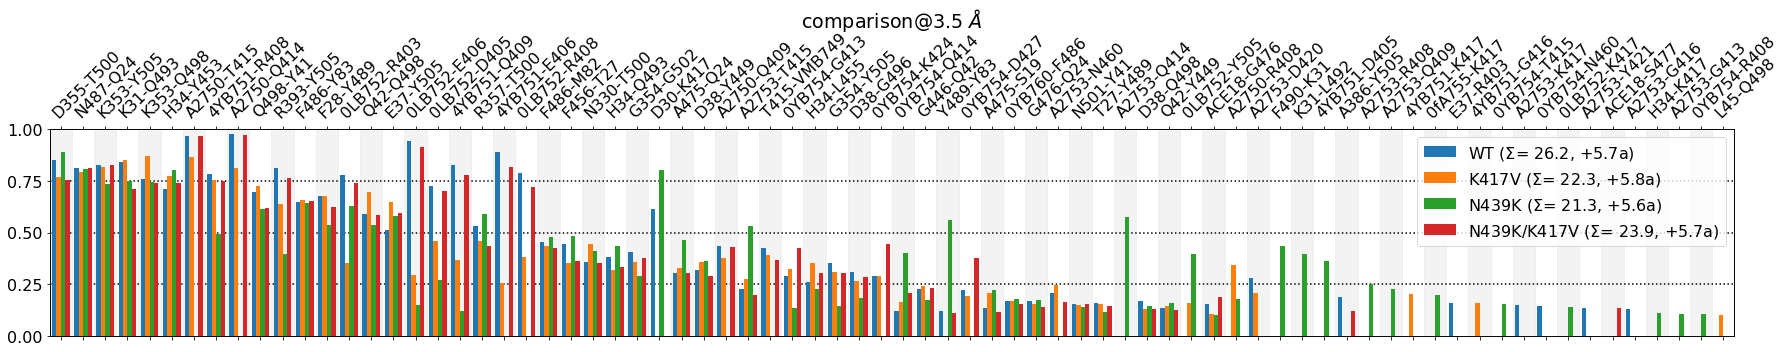

In [7]:
mdciao.plots.compare_groups_of_contacts(interfaces,
                                        ctc_cutoff_Ang=3.5,
                                        figsize=(25,5),
                                        remove_identities=True, 
                                        identity_cutoff=.80,
                                        mutations_dict={"V417": "K417",
                                                        "K439": "N439"
                                                       });

Some observations:

* Choosing an ``identity_cutoff=.80`` means we consider contacts that formed in over 80% (of the data of each setup) as *formed* as those contacs formed 100%. In our case, that means that the **first six** contacts have been hidden, up to ``G496-K353``:

In [8]:
DataFrame(plotted_freqs).round(3)[:7]

WT  K417V  N439K  N439K/K417V  mean
G502-K353  0.998  0.999  0.995        0.997  1.00
N487-Y83   0.963  0.965  0.966        0.970  0.97
E35-Q493   0.972  0.966  0.910        0.963  0.95
T500-Y41   0.956  0.971  0.921        0.961  0.95
K353-N501  0.930  0.937  0.899        0.923  0.92
G496-K353  0.915  0.946  0.869        0.918  0.91
D355-T500  0.854  0.771  0.890        0.755  0.82

<div class="alert alert-info">
    
<b>Note</b> 
    
In the above table we show the seventh row, ``D355-T500``, to show that, even though the **mean** value of  is over .80, the ``identity_cutoff>=.8`` must apply to **all** systems, which is not the case. Hence, in the plot above the table, ``D355-T500`` is the first shown contact
    
</div>

Continuing with the observations:

* The $\Sigma$ value is broken down into two contributions, e.g. for  ``WT`` it's $\Sigma$ = 26.2 + 5.7a. Those 5.7 are the **approximately six** hidden contacts that are **above** the identity cutoff. 

* All four systems, i.e all four $\Sigma$ values have hidden the same six contacts, s.t. the difference of approximately four contacts between ``WT`` and ``K417V``  is  conserved: 26 vs 22, respectively.

### Removing Small Values
We continue trimming the plot, now hiding negligible contributions using the argument ``lower_cutoff_val``. 
This is somehow **trimming from the right** (of the panel), i.e. removing the long tail of small bars from the plot:

These interactions are not shared:
0LB752-K417, 0LB752-R408, 0LB752-Y505, 0YB754-D427, 0YB754-K424, 0YB754-N460, 0YB754-R408, 0YB754-T415, 0fA755-K417, 4YB751-D405, 4YB751-E406, 4YB751-G416, 4YB751-K417, A2750-Q409, A2750-Q414, A2750-R408, A2750-T415, A2753-D420, A2753-G413, A2753-G416, A2753-K417, A2753-N460, A2753-Q409, A2753-Q414, A2753-R408, A2753-Y421, A386-Y505, ACE18-S477, D30-K417, E37-R403, F490-K31, H34-K417, K31-L492, L45-Q498, T415-VMB749, Y489-Y83
Their cumulative ctc freq is 22.73. 


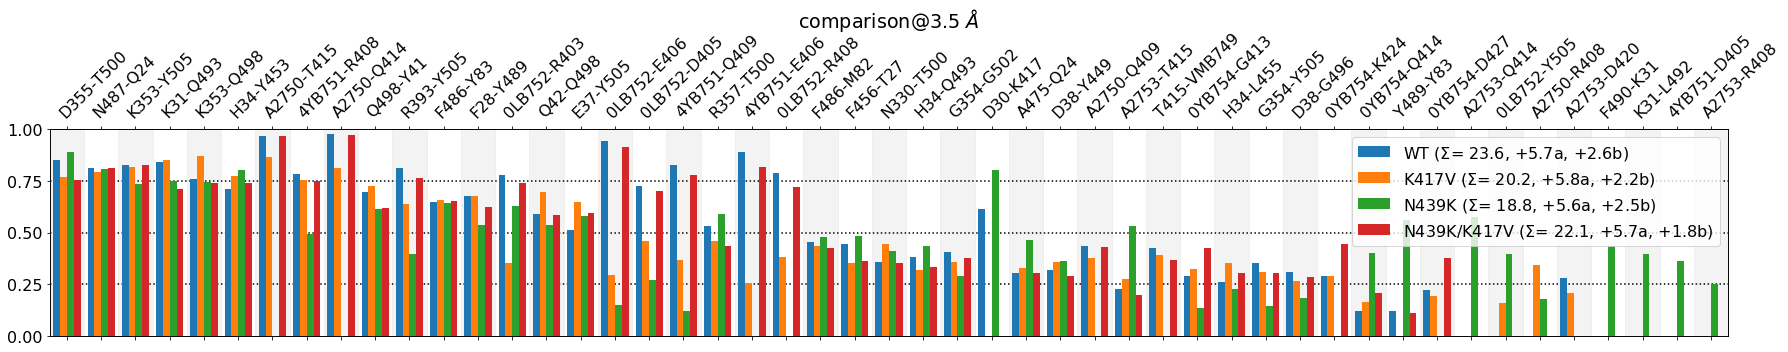

In [9]:
mdciao.plots.compare_groups_of_contacts(interfaces,
                                        ctc_cutoff_Ang=3.5,
                                        figsize=(25,5),
                                        remove_identities=True, 
                                        identity_cutoff=.80,
                                        mutations_dict={"V417": "K417",
                                                        "K439": "N439"
                                                       },
                                       lower_cutoff_val=.25
                                       );

Some observations:

* The plot is shorter from the right, there's no contacts where all bars are below .25

* $\Sigma$ values are again broken into one more term, e.g. for ``WT``: $\Sigma$ = 23.6 +5.7a +2.6b. Those 2.6 are the sum of the hidden bars, which are **below** (= *b* ) the cutoff

* The difference of approximately 4 contacts **on average** between ``WT`` and ``K417V`` is still somewhat conserved between 23.6 and 20.2, respectively 

If we really don't want the legend to be that large (it can get distracting), we can turn it off with ``verbose_legend=False``:

These interactions are not shared:
0LB752-K417, 0LB752-R408, 0LB752-Y505, 0YB754-D427, 0YB754-K424, 0YB754-N460, 0YB754-R408, 0YB754-T415, 0fA755-K417, 4YB751-D405, 4YB751-E406, 4YB751-G416, 4YB751-K417, A2750-Q409, A2750-Q414, A2750-R408, A2750-T415, A2753-D420, A2753-G413, A2753-G416, A2753-K417, A2753-N460, A2753-Q409, A2753-Q414, A2753-R408, A2753-Y421, A386-Y505, ACE18-S477, D30-K417, E37-R403, F490-K31, H34-K417, K31-L492, L45-Q498, T415-VMB749, Y489-Y83
Their cumulative ctc freq is 22.73. 


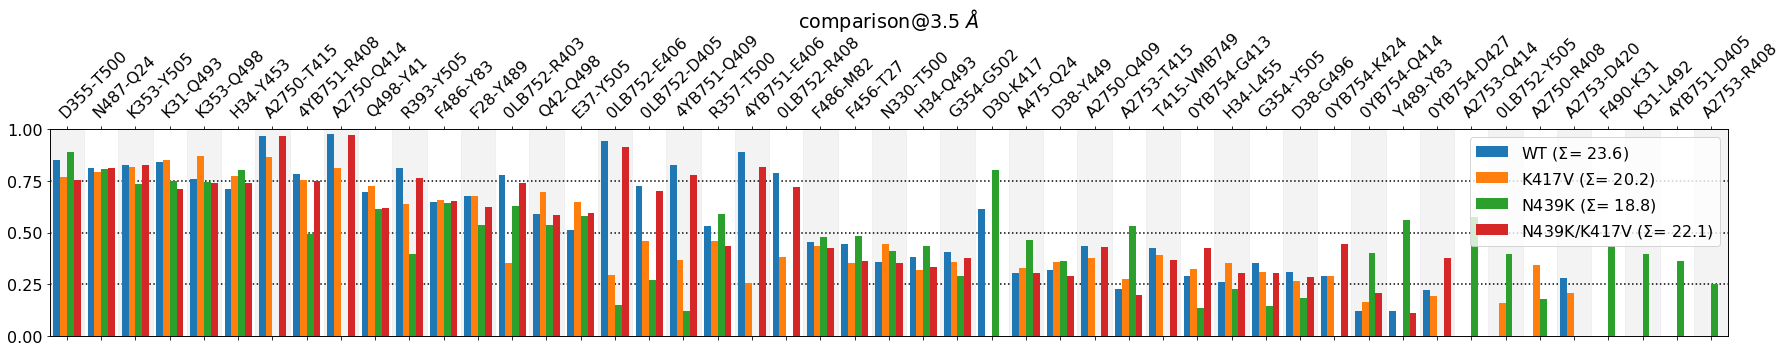

In [10]:
mdciao.plots.compare_groups_of_contacts(interfaces,
                                        ctc_cutoff_Ang=3.5,
                                        figsize=(25,5),
                                        remove_identities=True, 
                                        identity_cutoff=.80,
                                        mutations_dict={"V417": "K417",
                                                        "K439": "N439"
                                                       },
                                        lower_cutoff_val=.25,
                                        verbose_legend=False,
                                       );

### Visual Aides
Still, the plot contains a lot of information. We can make some of it stand out using a color code on the contact labels. The keyword is ``assign_w_color=True`` and the color-code is as follows:

* Only one system is present, i.e. its frequency is above the ``lower_cutoff_value``:  
  Color the label with the system's color and prepend it with "+" 

* Only one system is absent, i.e. its frequency is below the ``lower_cutoff_value``:  
  Color the label with the system's color and prepend it with "-" 



These interactions are not shared:
0LB752-K417, 0LB752-R408, 0LB752-Y505, 0YB754-D427, 0YB754-K424, 0YB754-N460, 0YB754-R408, 0YB754-T415, 0fA755-K417, 4YB751-D405, 4YB751-E406, 4YB751-G416, 4YB751-K417, A2750-Q409, A2750-Q414, A2750-R408, A2750-T415, A2753-D420, A2753-G413, A2753-G416, A2753-K417, A2753-N460, A2753-Q409, A2753-Q414, A2753-R408, A2753-Y421, A386-Y505, ACE18-S477, D30-K417, E37-R403, F490-K31, H34-K417, K31-L492, L45-Q498, T415-VMB749, Y489-Y83
Their cumulative ctc freq is 22.73. 


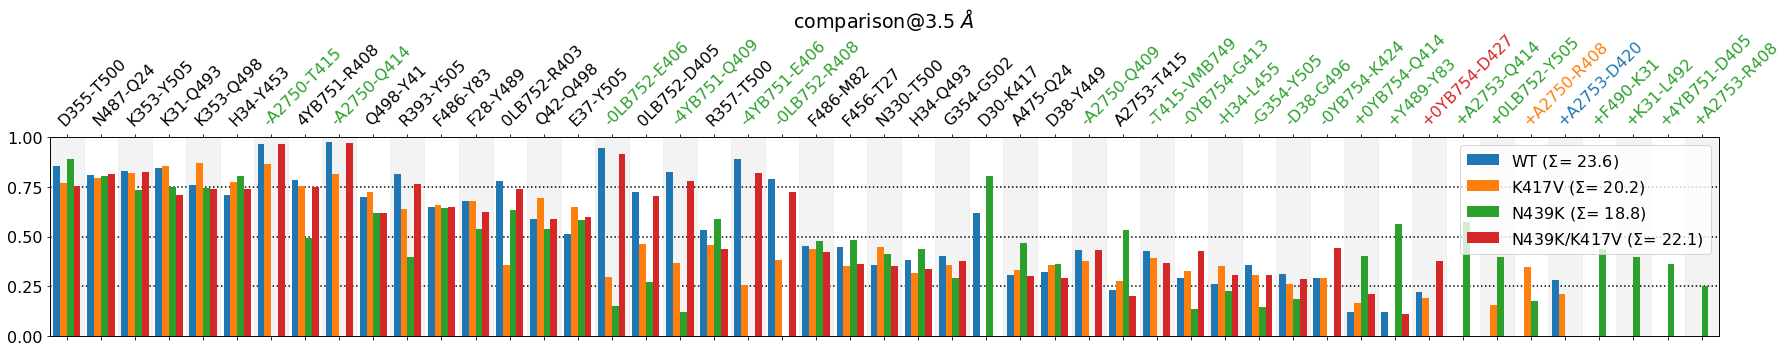

In [11]:
mdciao.plots.compare_groups_of_contacts(interfaces,
                                        ctc_cutoff_Ang=3.5,
                                        figsize=(25,5),
                                        remove_identities=True, 
                                        identity_cutoff=.80,
                                        mutations_dict={"V417": "K417",
                                                        "K439": "N439"
                                                       },
                                        lower_cutoff_val=.25,
                                        verbose_legend=False,
                                        assign_w_color=True,
                                       );

Some observations:

* ``N439K`` is missing a some contacts that are more present in the other systems, like ``A2750-T415, A2570-Q414, 4YB51-E406`` but has gained some other contacts only present in ``N439``: ``Y489-Y83, F490-K31, K31-L492``

* This loss of contacts is captured in part by ``N439K``'s $\Sigma$ being the lowest of all.

* The color code is **not** a definitive guide to what's important on the plot, but rather a short-hand for quick visual inspection. It misses some things like contacts where **two** systems are missing, and it's coupled to the ``lower_cutoff_val`` parameter.

* Even without the color code, it's somewhat easy to locate contacts the behavior is very different across systems, e.g. the salt bridge ``D30-K147`` and so on.

There's more ways of highlighting these types of highly variant contacts, we will touch on that later, but let's continue consolidating the plot.

### Consolidating the Plot
We can further summarize the interface comparison at the cost of loosing some information. We can aggregate contact frequencies by residue, so that we **no longer** look at individual residue-pairs, but rather at each residue's participation in the interface. We do that with ``per_residue=True``. 

These interactions are not shared:
0fA755, A386, D30, D420, D427, F490, G416, K417, K424, L45, L492, N460, S477, VMB749, Y421
Their cumulative ctc freq is 9.89. 


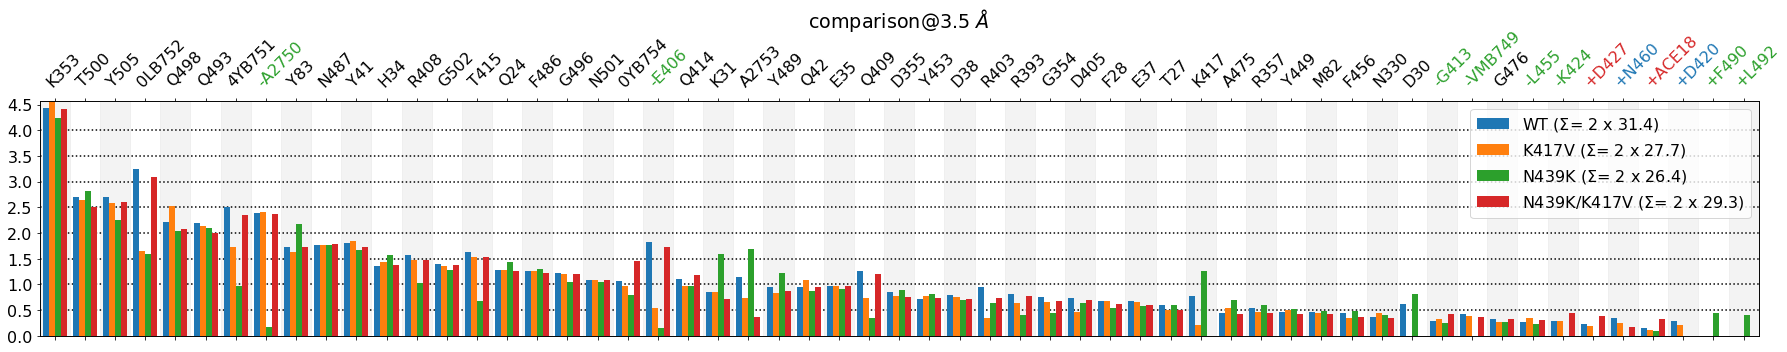

In [12]:
mdciao.plots.compare_groups_of_contacts(interfaces,
                                        ctc_cutoff_Ang=3.5,
                                        figsize=(25,5),
                                        remove_identities=True, 
                                        identity_cutoff=.80,
                                        mutations_dict={"V417": "K417",
                                                        "K439": "N439"
                                                       },
                                        lower_cutoff_val=.25,
                                        verbose_legend=False,
                                        assign_w_color=True,
                                        per_residue=True,
                                       );

Some observations:

* ``K353`` stands out as the **most involved** residue in the interface, across all setups

* ``A2750`` and ``E406`` don't participate in the interface in ``N439K`` mutant

* $\Sigma$ values are represented as 2 x 31.4 (e.g. for ``WT``), because the actual sum of the represented bars is 62.8, but the number of involved contacts is half of that.

* ``remove_identities`` is left without effect (it's in the documentation of the method)

* ``lower_cutoff_val`` works as expected

### Showing Fragment Information: Informative Labels
So far, we've been hiding the fragment information, i.e., to what molecular fragments [``ACE``, ``RBD`` and/or their glycans ``GLC@ACE`` and ``GLC@RBD``] a given residue belongs to. That's because [mdciao.plots.compare_groups_of_contacts](https://proteinformatics.uni-leipzig.de/mdciao/api/generated/generated/mdciao.plots.compare_groups_of_contacts.html) uses ``defrag=@`` by default. This parameter tells ``mdciao`` that, in the contact labels, residues have been affiliated to their fragments using the ``@``-symbol and that we want to use that information to remove (``defrag``) those affiliations from the labels, typically to make labels more compact. Using ``defrag=None`` yields: 

These interactions are not shared:
0fA755@GLY_ACE, A386@ACE, D30@ACE, D420@RBD, D427@RBD, F490@RBD, G416@RBD, K417@RBD, K424@RBD, L45@ACE, L492@RBD, N460@RBD, S477@RBD, VMB749@GLY_ACE, Y421@RBD
Their cumulative ctc freq is 9.89. 


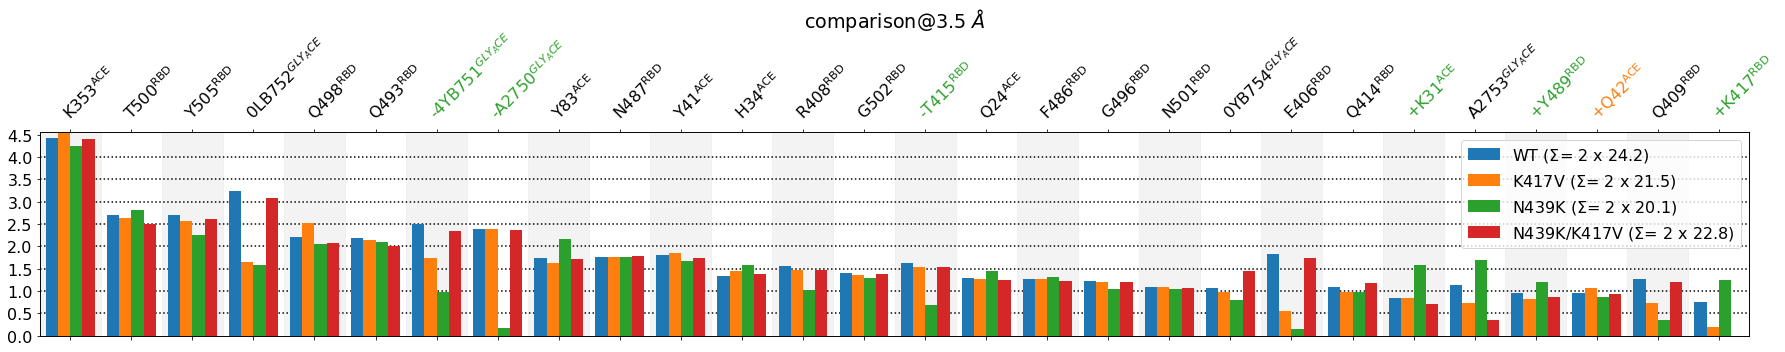

In [13]:
mdciao.plots.compare_groups_of_contacts(interfaces,
                                        ctc_cutoff_Ang=3.5,
                                        figsize=(25,5),
                                        remove_identities=True, 
                                        identity_cutoff=.80,
                                        mutations_dict={"V417": "K417",
                                                        "K439": "N439"
                                                       },
                                        lower_cutoff_val=1,
                                        verbose_legend=False,
                                        assign_w_color=True,
                                        per_residue=True,
                                        defrag=None,
                                       );

Some observations:  

* Now the labels include the fragment, e.g. ``E406@RBD`` or ``A2750@GLC_ACE``.

* ``lower_cutoff_val=1`` hides those residues involved, **on average**, in less than one interface-contact.

### Using Fragment Information: Sorting by Interface Side
Still, we can continue tweaking the plot to separate residues according to what **side** of the interface they are on. Setting ``interface=True`` tells ``mdciao`` that the [mdciao.contacts.ContactGroup](https://proteinformatics.uni-leipzig.de/mdciao/api/generated/generated/mdciao.contacs.ContactGroup)-objects contained the in variable ``interfaces`` can be assigned to one of the two sides of an interface. 


This is possible because in the [original notebook]() these [ContactGroups](https://proteinformatics.uni-leipzig.de/mdciao/api/generated/generated/mdciao.contacs.ContactGroup) were initialized using [mdciao.cli.interface](https://proteinformatics.uni-leipzig.de/mdciao/api/generated/generated/mdciao.cli.interface.html).

These interactions are not shared:
0fA755@GLY_ACE, A386@ACE, D30@ACE, D420@RBD, D427@RBD, F490@RBD, G416@RBD, K417@RBD, K424@RBD, L45@ACE, L492@RBD, N460@RBD, S477@RBD, VMB749@GLY_ACE, Y421@RBD
Their cumulative ctc freq is 9.89. 


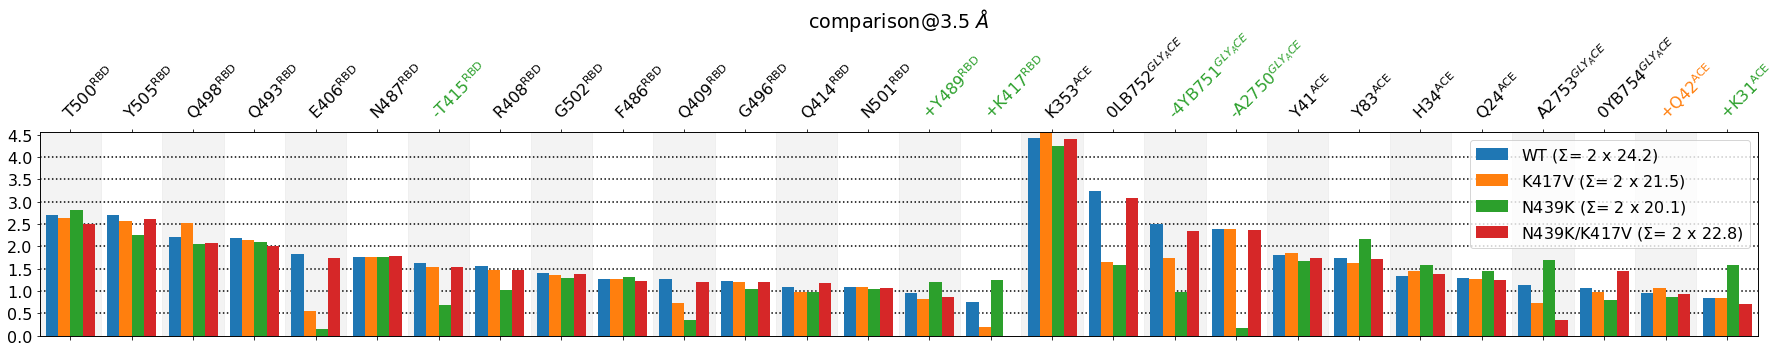

In [14]:
mdciao.plots.compare_groups_of_contacts(interfaces,
                                        ctc_cutoff_Ang=3.5,
                                        figsize=(25,5),
                                        remove_identities=True, 
                                        identity_cutoff=.80,
                                        mutations_dict={"V417": "K417",
                                                        "K439": "N439"
                                                       },
                                        lower_cutoff_val=1,
                                        verbose_legend=False,
                                        assign_w_color=True,
                                        per_residue=True,
                                        defrag=None,
                                        interface=True
                                       );

The sorting now puts first the residues belonging to the ``[RBD,GLC@RBD]``-side followed by those belonging to ``[ACE,GLC@ACE``]-side. This immediately informs about the residues that participate **the most** in the interface between domains, namely, for the ``RBD``: ``T500, Y505`` and for the ``ACE``: ``K353`` by far, then three glycans, one of them severely impacted by the ``N439K`` mutation.

## Sorting by Standard Deviation
So far, contacts have been shown in descending order of mean frequency values, i.e., those contacts most formed are shown first, those less formed are shown last, which seems *natural* if the goal is to characterize the interface itself. 

However, our goal is also easily spot **diferences across setups**, in this case the effect of the mutations ``K417V, N439K, N439K/K417``.

We can do that with ``sort_by=std``. First, let's see how that affects **all contacts** (without cutoffs, identites or whatever), and then we will trim it down as we did above:

These interactions are not shared:
0LB752-K417, 0LB752-R408, 0LB752-Y505, 0YB754-D427, 0YB754-K424, 0YB754-N460, 0YB754-R408, 0YB754-T415, 0fA755-K417, 4YB751-D405, 4YB751-E406, 4YB751-G416, 4YB751-K417, A2750-Q409, A2750-Q414, A2750-R408, A2750-T415, A2753-D420, A2753-G413, A2753-G416, A2753-K417, A2753-N460, A2753-Q409, A2753-Q414, A2753-R408, A2753-Y421, A386-Y505, ACE18-S477, D30-K417, E37-R403, F490-K31, H34-K417, K31-L492, L45-Q498, T415-VMB749, Y489-Y83
Their cumulative ctc freq is 22.73. 


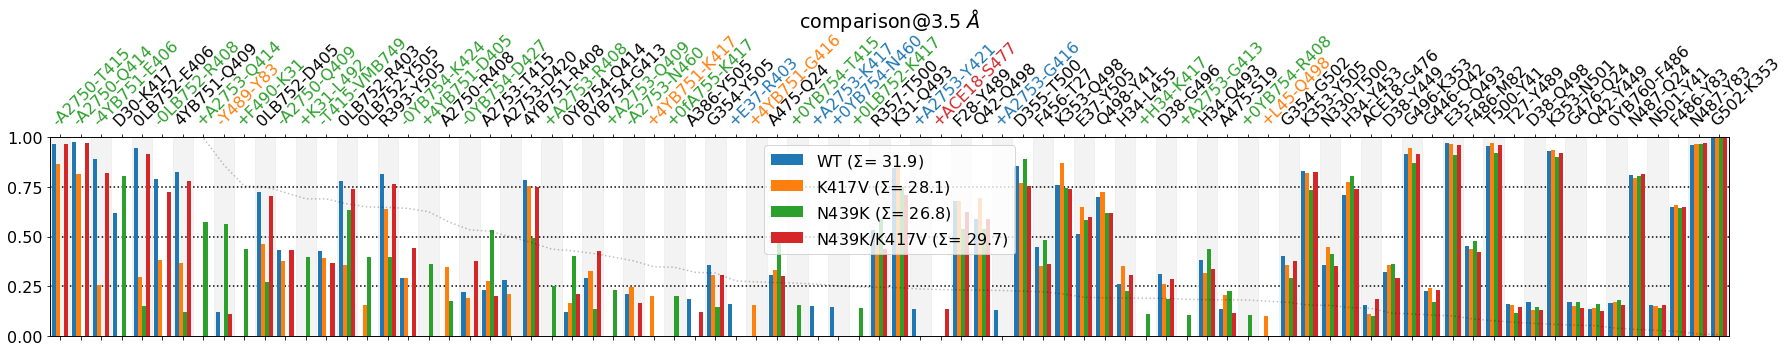

In [15]:
mdciao.plots.compare_groups_of_contacts(interfaces,
                                        ctc_cutoff_Ang=3.5,
                                        figsize=(25,5),                                       
                                        mutations_dict={"V417": "K417",
                                                        "K439": "N439"
                                                       },
                                        verbose_legend=False,
                                        assign_w_color=True,
                                        sort_by="std",
                                       );

Some observations, since the plot looks quite different:

* At the rightmost edge, we have the least variant contacts (low standard deviation, *std*), regardless of the contacts themselves being highly conserved (``G502-K353``, 100% across systems) or barely there (``Q42-Y449``, 15% across systems)

* At the leftmost edge, we have the most variant contacts (high *std*), e.g. ``A2750-T415`` is almost **fully present** in three systems, and **fully absent** in one.

* There's a faint dotted line descending horizontally in the background. **That line is the numerical value of the *std* itself**. The reason for plotting it is that now ``lower_cutoff_val`` operates on the *std* itself, not on the mean frequency. From the docs:
```
sort_by : str, default is "mean"
    The property by which to sort the contacts.
    It is always descending and the property can be:
     * "mean" sort by mean frequency over all systems, making most
       frequent contacts appear on the left/top of the plot.
     * "std" sort by per-contact standard deviation over all systems, making
       the contacts with most different values appear on top. This
       highlights more "deviant" contacts and might hence be
       more informative than "mean" in cases where a lot of
       contacts have similar frequencies (high or low). If this option
       is activated, a faint dotted line is incorporated into the plot
       that marks the std for each contact group
[...]
lower_cutoff_val : float, default is 0
    Hide contacts with small values. "values" changes
    meaning depending on :obj:`sort_by`. If :obj:`sort_by` is:
     * "mean" or "keep" or "numeric", then hide contacts where **all**
       systems have frequencies lower than this value.
     * "std", then hide contacts where the standard
       deviation across systems *itself* is lower than this value.
       This hides contacts where all systems are
       similar, regardless of whether they're all
       around 1, around .5 or around 0
```

Meaning, by looking at the faint dotted line, we can decide what ``lower_cutoff_val`` we want to use to truncate the plot from the right, e.g. ``lower_cutoff_val=.25``. We can also include now ``defrag=None`` since the plot will be less crowded and also ``legend_rows=2``, to make the legend less invasive:

These interactions are not shared:
0LB752@GLY_ACE-K417@RBD, 0LB752@GLY_ACE-R408@RBD, 0LB752@GLY_ACE-Y505@RBD, 0YB754@GLY_ACE-D427@RBD, 0YB754@GLY_ACE-K424@RBD, 0YB754@GLY_ACE-N460@RBD, 0YB754@GLY_ACE-R408@RBD, 0YB754@GLY_ACE-T415@RBD, 0fA755@GLY_ACE-K417@RBD, 4YB751@GLY_ACE-D405@RBD, 4YB751@GLY_ACE-E406@RBD, 4YB751@GLY_ACE-G416@RBD, 4YB751@GLY_ACE-K417@RBD, A2750@GLY_ACE-Q409@RBD, A2750@GLY_ACE-Q414@RBD, A2750@GLY_ACE-R408@RBD, A2750@GLY_ACE-T415@RBD, A2753@GLY_ACE-D420@RBD, A2753@GLY_ACE-G413@RBD, A2753@GLY_ACE-G416@RBD, A2753@GLY_ACE-K417@RBD, A2753@GLY_ACE-N460@RBD, A2753@GLY_ACE-Q409@RBD, A2753@GLY_ACE-Q414@RBD, A2753@GLY_ACE-R408@RBD, A2753@GLY_ACE-Y421@RBD, A386@ACE-Y505@RBD, ACE18@ACE-S477@RBD, D30@ACE-K417@RBD, E37@ACE-R403@RBD, F490@RBD-K31@ACE, H34@ACE-K417@RBD, K31@ACE-L492@RBD, L45@ACE-Q498@RBD, T415@RBD-VMB749@GLY_ACE, Y489@RBD-Y83@ACE
Their cumulative ctc freq is 22.73. 


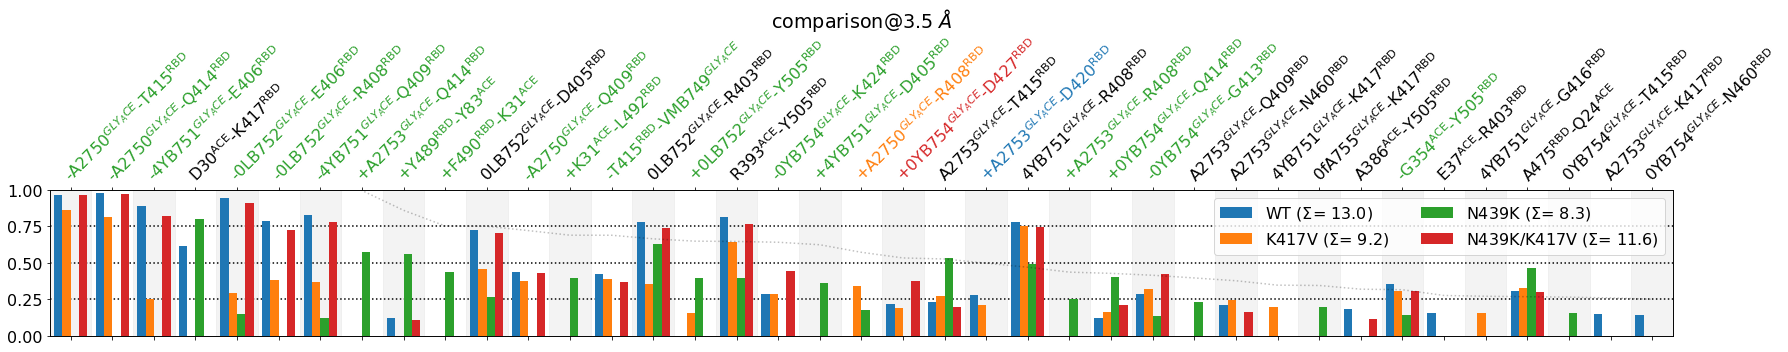

In [16]:
mdciao.plots.compare_groups_of_contacts(interfaces,
                                        ctc_cutoff_Ang=3.5,
                                        figsize=(25,5),                                       
                                        mutations_dict={"V417": "K417",
                                                        "K439": "N439"
                                                       },
                                        verbose_legend=False,
                                        assign_w_color=True,
                                        sort_by="std",
                                        lower_cutoff_val=.25,
                                        defrag=None,
                                        legend_rows=2
                                       );

The leftmost part of the plot is filled with highly variant contacts, where the mutation ``N439K`` has most impacted the interface in the ``ACE``-glycans. 

If we now combine this with ``per_residue=True``:

These interactions are not shared:
0fA755@GLY_ACE, A386@ACE, D30@ACE, D420@RBD, D427@RBD, F490@RBD, G416@RBD, K417@RBD, K424@RBD, L45@ACE, L492@RBD, N460@RBD, S477@RBD, VMB749@GLY_ACE, Y421@RBD
Their cumulative ctc freq is 9.89. 


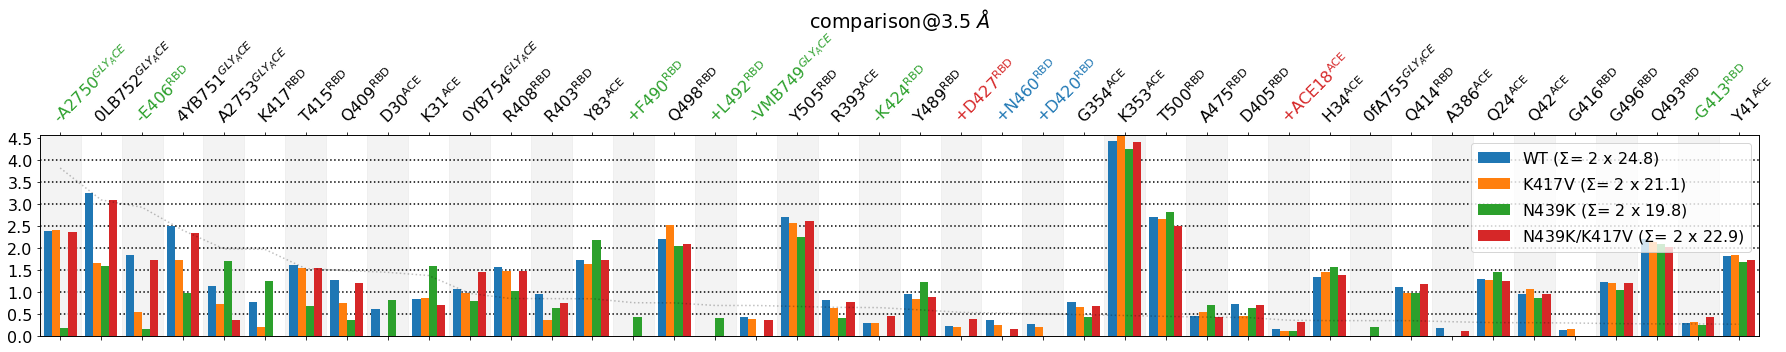

In [17]:
mdciao.plots.compare_groups_of_contacts(interfaces,
                                        ctc_cutoff_Ang=3.5,
                                        figsize=(25,5),                                       
                                        mutations_dict={"V417": "K417",
                                                        "K439": "N439"
                                                       },
                                        verbose_legend=False,
                                        assign_w_color=True,
                                        sort_by="std",
                                        lower_cutoff_val=.25,
                                        defrag=None,
                                        per_residue=True,
                                       );

The ``lower_cutoff_val`` **needs to be tweaked again**, since aggregating frequencies by residue results in higher values being shown, which results in other, usually higher, *std* values. Again, we use the faint dotted line to help us choose the value: ``lower_cutoff_val=1``:



These interactions are not shared:
0fA755@GLY_ACE, A386@ACE, D30@ACE, D420@RBD, D427@RBD, F490@RBD, G416@RBD, K417@RBD, K424@RBD, L45@ACE, L492@RBD, N460@RBD, S477@RBD, VMB749@GLY_ACE, Y421@RBD
Their cumulative ctc freq is 9.89. 


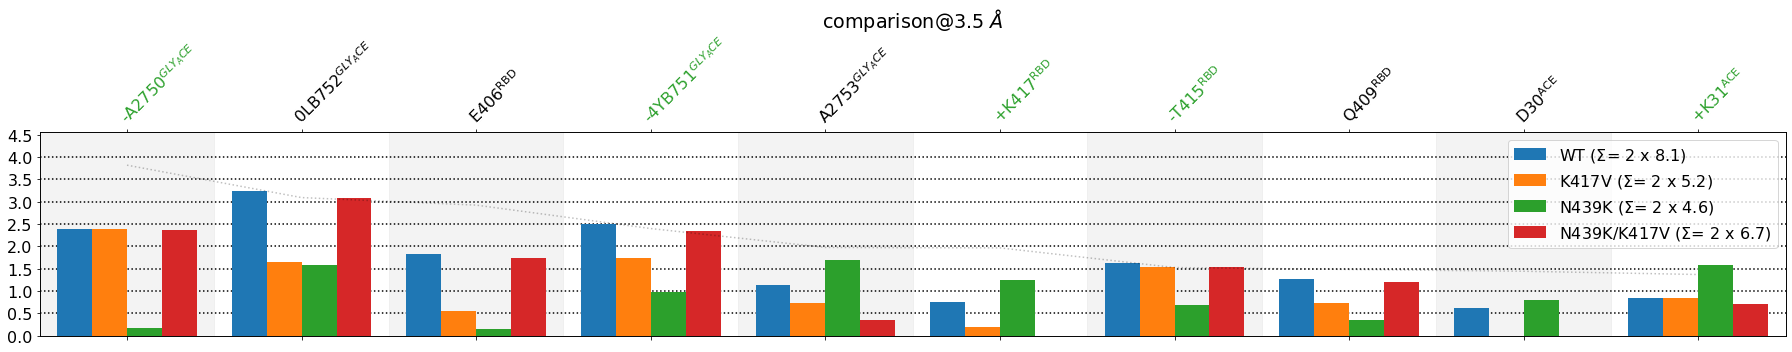

In [18]:
mdciao.plots.compare_groups_of_contacts(interfaces,
                                        ctc_cutoff_Ang=3.5,
                                        figsize=(25,5),                                       
                                        mutations_dict={"V417": "K417",
                                                        "K439": "N439"
                                                       },
                                        verbose_legend=False,
                                        assign_w_color=True,
                                        sort_by="std",
                                        lower_cutoff_val=1,
                                        per_residue=True,
                                        defrag=None,
                                       );

## Coloring
Finally, if the colors have been bothering you, you can either pass them along directly or choose from matplotlib's [colormaps](https://matplotlib.org/stable/tutorials/colors/colormaps.html):

```
colors : iterable (list or dict), or str, default is None
    * If list, the colors will be assigned in the same
      order of :obj:`groups`.
    * If dict, has to have the
      same keys as :obj:`groups`.
    * If str, it has to be a case-sensitve colormap-name of matplotlib:
      https://matplotlib.org/stable/tutorials/colors/colormaps.html
    * If None, the 'tab10' colormap (tableau) is chosen
```


These interactions are not shared:
0fA755@GLY_ACE, A386@ACE, D30@ACE, D420@RBD, D427@RBD, F490@RBD, G416@RBD, K417@RBD, K424@RBD, L45@ACE, L492@RBD, N460@RBD, S477@RBD, VMB749@GLY_ACE, Y421@RBD
Their cumulative ctc freq is 9.89. 


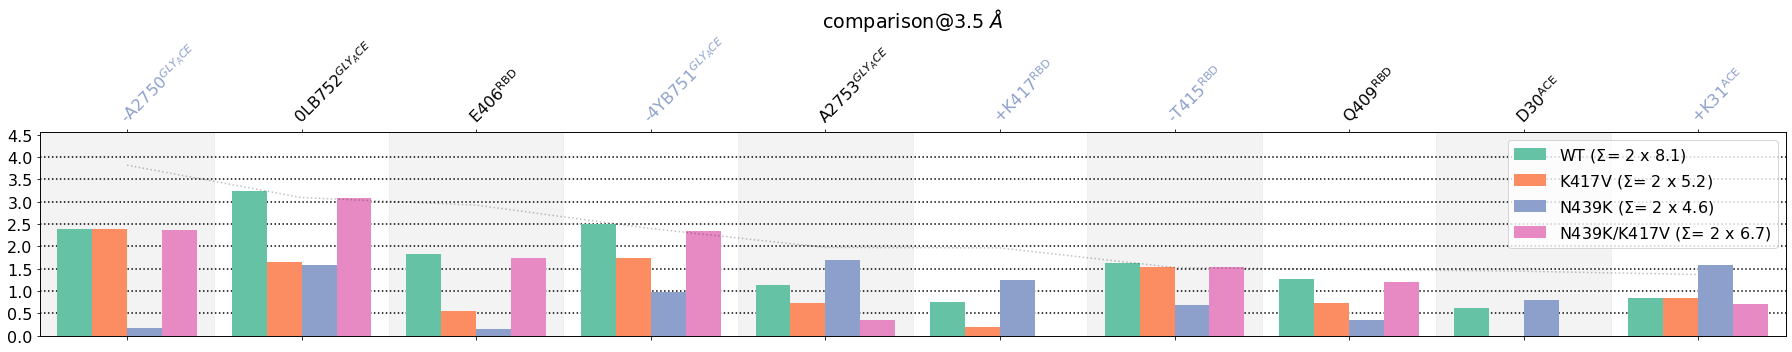

In [19]:
mdciao.plots.compare_groups_of_contacts(interfaces,
                                        ctc_cutoff_Ang=3.5,
                                        figsize=(25,5),                                       
                                        mutations_dict={"V417": "K417",
                                                        "K439": "N439"
                                                       },
                                        verbose_legend=False,
                                        assign_w_color=True,
                                        sort_by="std",
                                        lower_cutoff_val=1,
                                        per_residue=True,
                                        defrag=None,
                                        colors="Set2"
                                       );